In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

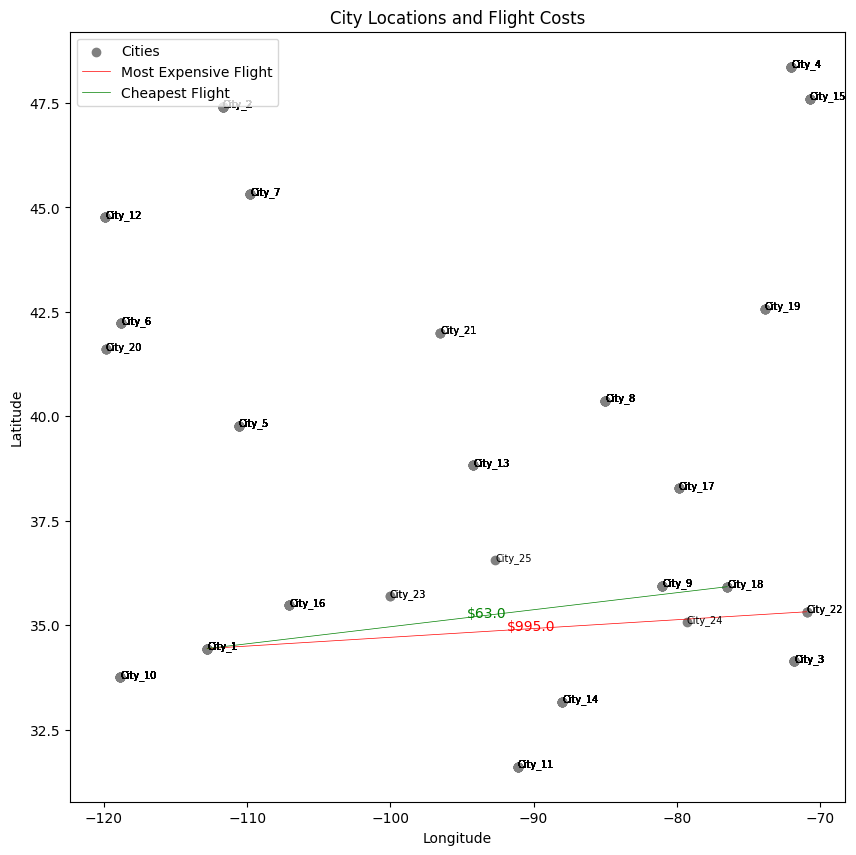

In [10]:
# ---
# Group No. 1
# 1. นาย พศิน บุญชู 6410450532
# 2. นาย ณัฐภัทร ภารกุล 6410451644
# 3. นาย นิธิภัทร เบญจม์ภัทร 6410451725
# ---

group = 1 # กลุ่มที่ 1
problem = 5 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)


# --- เริ่มเขียนโค้ดตรงนี้ ---

# สร้าง list เมือง ลัตติจูต และ ลองติจูต
city_list = []
lat_list = []
lon_list = []

# เพิ่ม ชื่อ เมือง,ลัตติจูต,ลองติจูต เก็บไว้ในลิส ที่สร้างขึ้นมา
for i in range(len(data)):
    city = data.loc[i, "OriginCity"]
    lat = data.loc[i, "OriginLat"]
    lon = data.loc[i, "OriginLong"]
    city_list.append(city)
    lat_list.append(lat)
    lon_list.append(lon)

# เพิ่ม ชื่อเมือง,ลัตติจูต,ลองติจูต สุดท้ายเข้าไปในลิส
city_list.append(data.loc[len(data)-1, "DestCity"])
lat_list.append(data.loc[len(data)-1, "DestLat"])
lon_list.append(data.loc[len(data)-1, "DestLong"])
# เรียงข้อมูล
city_list.sort
lat_list.sort
lon_list.sort

# เอา cloumns ['AirFarePrice'] ที่ไม่มีราคาเที่ยว บิน ออก
indices = data.loc[data['AirFarePrice'] == data['AirFarePrice'].min()].index # หา rows ที่ไม่มี ราคาเที่ยวบิน
data = data.drop(indices) # ลบ rows ที่ไม่มีราคาเที่ยวบิน

# เปลี่ยน ข้อความใน colums 'AirFarePrice' ให้เป็นตัวเลข
data['AirFarePrice'] = pd.to_numeric(data['AirFarePrice'], errors='coerce')


# หาเที่ยวบิน ที่ถูกที่สุด และแพงที่สุด
max_index = data['AirFarePrice'].idxmax() # หาเที่ยวบินที่แพงที่สุด โดยเก็บ เป็น index
min_index = data['AirFarePrice'].idxmin() # เที่ยวบินที่ถูกที่สุด โดยเก็บ เป็น index
data = data.loc[[max_index,min_index]] # ทำให้ เหลือแค่ เที่ยวบินที่ ถูก และ แพง ที่สุด

# สรา้งกราฟ
# กำหนดขนาดกราฟ
plt.figure(figsize=(10, 10))

# สร้างกราฟจุด โดยแสดงจุด เมืองต่างๆ
plt.scatter(lon_list,lat_list, label='Cities', marker='o',color='gray')

# สร้างเส้นเชื่อม เมืองที่ เที่ยวบินแพงที่สุด
plt.plot([data.iloc[0, 2],data.iloc[0, 5]],[data.iloc[0, 1],data.iloc[0, 4]], color='red', label='Most Expensive Flight',linewidth=0.5)
plt.text((data.iloc[0, 2]+data.iloc[0, 5])/2,(data.iloc[0, 1]+data.iloc[0, 4])/2, '$'+str(float(data.iloc[0, 8])), rotation=0, fontsize=10, color='red') # ใส่ ราคาระบุ บนเส้น

# สร้างเส้นเชื่อม เมืองที่ เที่ยวบินถูกที่สุด
plt.plot([data.iloc[1, 2],data.iloc[1, 5]],[data.iloc[1, 1],data.iloc[1, 4]], color='green', label='Cheapest Flight',linewidth=0.5)
plt.text((data.iloc[1, 2]+data.iloc[1, 5])/2,(data.iloc[1, 1]+data.iloc[1, 4])/2, '$'+str(float(data.iloc[1, 8])), rotation=0, fontsize=10, color='green') # ใส่ ราคาระบุ บนเส้น

# วนลูปเพื่อ ระบุชื่อเมืองลงบน จุด
for i in range(0,len(city_list)):
  plt.annotate(city_list[i], xy=(lon_list[i],lat_list[i]),fontsize=7)

# ใส่ชื่อ ต่างๆ ในกราฟ
plt.xlabel('Longitude') #ใส่ชื่อแกน x
plt.ylabel('Latitude') #ใส่ชื่อแกน y
plt.title('City Locations and Flight Costs') #ใส่ชื่อกราฟ
plt.legend() # สร้าง กล่องข้อความ บอกความหมายของจุดต่างๆ

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()